# Notebook to analyze Daedalus reports

This script plots histograms based on the data produced by a Daedalus report.


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def parse_report(file_path):
    """
    Parses a Daedalus report and returns summary metrics and merged slice data.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    parsed_data = {}
    current_dict = parsed_data
    current_slice = None

    for line in lines:
        if line.startswith('mergedSlicesMetadata:'):
            current_dict = dict()
        elif line.startswith('\t'):
            if '=' in line:
                key, value = line.split('=')
                key = key.strip()
                value = int(value.strip())
                current_dict[current_slice][key] = value
            else:
                current_slice = line.strip(':').strip()
                current_dict[current_slice] = {}
        elif '=' in line:
            key, value = line.split('=')
            parsed_data[key.strip()] = int(value.strip())

    return parsed_data, current_dict

# Directory containing the log files
log_dir = '../../tests/'
log_files = [os.path.join(log_dir, f) for f in os.listdir(log_dir) if f.endswith('_slices_report.log')]

# Debug: Check if log files are found
if not log_files:
    print("No log files found in the directory!")
else:
    print(f"Found {len(log_files)} log files.")

# Initialize container for summary data
summary_data = []

# Process each file
for log_file in log_files:
    try:
        summary_metrics, mergedSlicesMetadata = parse_report(log_file)
        if len(mergedSlicesMetadata) > 0:
            print(mergedSlicesMetadata)
        summary_metrics['file'] = os.path.basename(log_file)  # Add filename for reference
        summary_data.append(summary_metrics)
    except Exception as e:
        print(f"Error processing file {log_file}: {e}")

# Create summary dataframe
if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print("Summary DataFrame:")
    display(summary_df)
else:
    print("No summary data to display.")


Found 47 log files.
{'_wyvern_slice_Fit__242452788:': {'size': 5, 'numberOfMergedFunctions': 3}}
{'_wyvern_slice_main__669757403:': {'size': 4, 'numberOfMergedFunctions': 2}}
{'_wyvern_slice_Fft__318882746:': {'size': 6, 'numberOfMergedFunctions': 2}}
{'_wyvern_slice_main__413558609:': {'size': 4, 'numberOfMergedFunctions': 2}, '_wyvern_slice_main__149850101:': {'size': 4, 'numberOfMergedFunctions': 2}, '_wyvern_slice_main__345371554:': {'size': 4, 'numberOfMergedFunctions': 2}, '_wyvern_slice_main__397478329:': {'size': 4, 'numberOfMergedFunctions': 2}}
{'_wyvern_slice_caller__84171585:': {'size': 5, 'numberOfMergedFunctions': 2}}
{'_wyvern_slice_Intmm__190745675:': {'size': 4, 'numberOfMergedFunctions': 2}, '_wyvern_slice_Intmm__304705533:': {'size': 5, 'numberOfMergedFunctions': 2}, '_wyvern_slice_Intmm__411554156:': {'size': 4, 'numberOfMergedFunctions': 2}}
{'_wyvern_slice_main__386824184:': {'size': 4, 'numberOfMergedFunctions': 2}}
Summary DataFrame:


,totalFunctionsOutlined,totalSlicesMerged,totalSlicesDiscarded,sizeOfLargestSliceBeforeMerging,sizeOfLargestSliceAfterMerging,file
0,4,0,4,9,0,RealMM_slices_report.log
1,0,0,0,0,0,test34_slices_report.log
2,2,0,2,4,0,Treesort_slices_report.log
3,0,0,0,0,0,test4_slices_report.log
4,0,0,0,0,0,test10_slices_report.log
5,1,0,1,5,0,test23_slices_report.log
6,2,0,2,9,0,test20_slices_report.log
7,11,2,8,9,6,Puzzle_slices_report.log
8,1,0,1,4,0,Perm_slices_report.log
9,2,1,0,5,5,test29_slices_report.log


## Histogram of Total Largest Slices After Merging

Plot histogram if sizeOfLargestSliceAfterMerging data is available


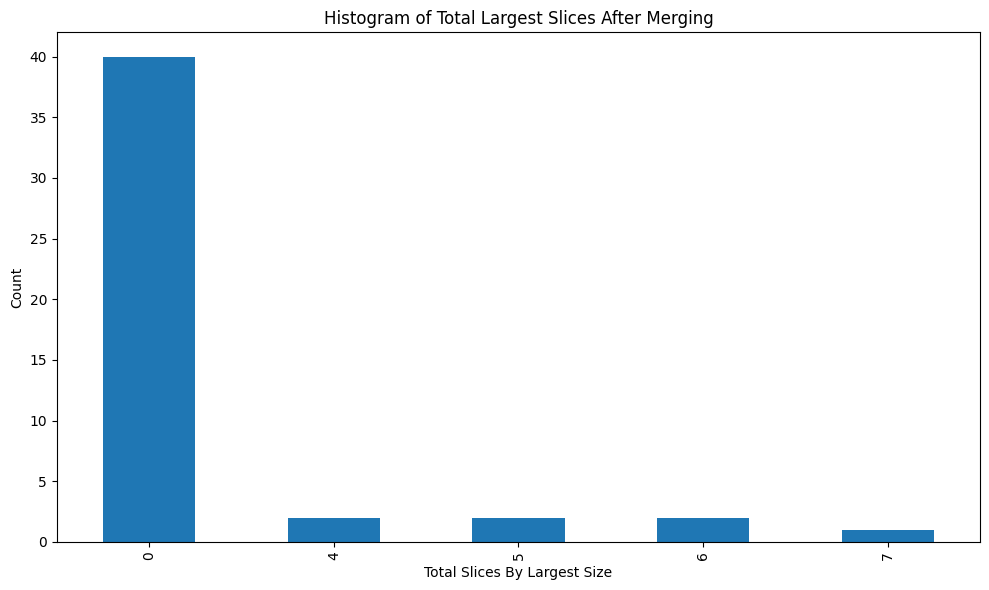

In [6]:
if not summary_df.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    summary_df['sizeOfLargestSliceAfterMerging'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title('Histogram of Total Largest Slices After Merging')
    ax.set_xlabel('Total Slices By Largest Size')
    ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot the histogram.")